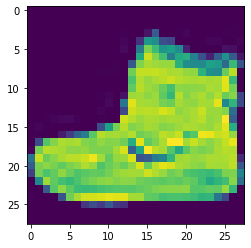

In [46]:
import tensorflow as tf 
from tensorflow.keras import datasets,layers,optimizers
import matplotlib.pyplot as plt
import numpy as np

#加载
(train_image,train_lable),(test_image,test_label) = datasets.fashion_mnist.load_data()
#归一化初始数据:如果要进行GPU加速，需要把np的数据转换成tensor的格式
train_image = train_image/255
test_image = test_image/255

# 将lable标签转换成one_hot的向量
train_lable = tf.keras.utils.to_categorical(train_lable)
test_label = tf.keras.utils.to_categorical(test_label)

plt.imshow(train_image[0])

In [47]:
train_image = train_image.reshape(train_image.shape[0],train_image.shape[1],train_image.shape[2],1)
train_image.shape
test_image = test_image.reshape(test_image.shape[0],test_image.shape[1],test_image.shape[2],1)


In [48]:
train_image.shape


(60000, 28, 28, 1)

In [ ]:
# 建立一个序列model
model = tf.keras.Sequential([
#     layers.Flatten(input_shape=(28,28)),
    layers.Conv2D(32,2,padding='same',input_shape=(28,28,1),activation='relu'),
    layers.Dropout(0.2),
    layers.MaxPooling2D((2,2),strides=2),
    layers.Conv2D(64,2,padding='same',activation='relu'),
    layers.Dropout(0.2),
    layers.MaxPool2D((2,2),strides=2),
    layers.Flatten(), # 这里要把卷积数据打平，不然用卷积执行全连接相当于用一个1*1kernel_size的过滤器做了一次卷积，shape不会改变
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.summary()

# 设置模型的相关超参数
optimizer = optimizers.Adam(0.01)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['acc'])

# 模型执行
history = model.fit(train_image,train_lable,batch_size=512,epochs=10,validation_data=(test_image,test_label))

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)            

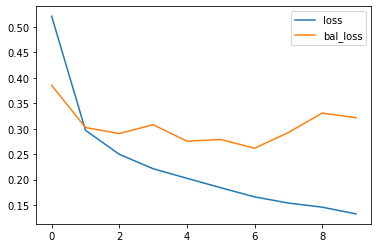

In [56]:
plt.plot(history.epoch,history.history['loss'],label='loss')
plt.plot(history.epoch,history.history['val_loss'],label='bal_loss')
plt.legend()# 显示右上角的指示

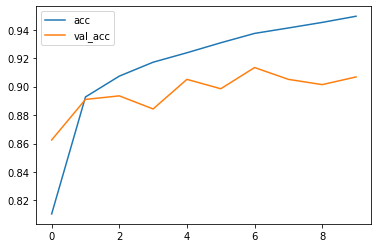

In [57]:
plt.plot(history.epoch,history.history['acc'],label='acc')
plt.plot(history.epoch,history.history['val_acc'],label='val_acc')
plt.legend()

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

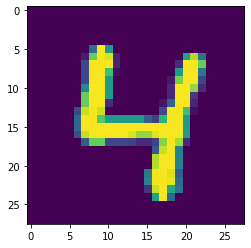

In [100]:
test_index = 56
plt.imshow(test_image[test_index])
test_label[test_index]

In [101]:
model.evaluate(test_image,test_label)
predict = model.predict(test_image)
np.argmax(predict[test_index])

10000/10000 [==============================] - 0s 16us/sample - loss: 0.1331 - acc: 0.9650


4